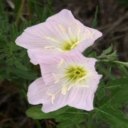

In [3]:
import torchvision
import torch
from PIL import Image
# python 3.12.8
# Create a vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("../Module 1/flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("../Module 1/flowers", "test", transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())
visualize_image(train_dataset[4][0])

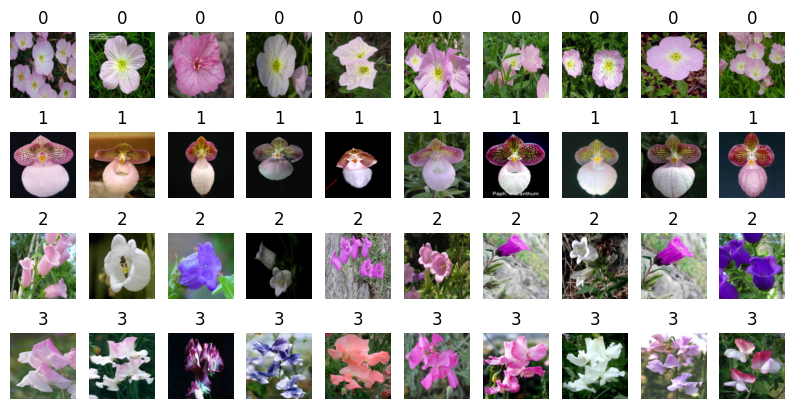

In [5]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10, figsize=(10,5))
for i, (im, l) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(l)
    ax[i // 10, i % 10].axis('off')


In [7]:
train_images = torch.stack([im for im, _ in train_dataset], dim=0)
train_label = torch.tensor([label for _, label in train_dataset])

In [13]:
train_images_01 = train_images[train_label <= 1]
train_label_01 = train_label[train_label <= 1]

model = torch.nn.Linear(3 * 128 * 128, 1)
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)

for epoch in range(100):
    # Compute model output
    out = model(train_images_01.view(-1, 3 * 128 * 128))

    # Compute loss
    loss_val = loss(out.squeeze(), train_label_01.float())

    # COmpute gradient and update weights
    optimizer.zero_grad()
    loss_val.backward()
    optimizer.step()
    print(f"{epoch=} {loss_val.item()=}")
    ## the for loop computes the forward pass of the model which is the output
    ## just like regression the model outputs exactly the same
    ## what changes here is the loss function changes
    ## the loss function now converts this value to signal value into probability of class 1 vs class 0
    ## then takes the log of that probability under the correct label

epoch=0 loss_val.item()=0.6961020231246948
epoch=1 loss_val.item()=0.6105846762657166
epoch=2 loss_val.item()=0.5430377721786499
epoch=3 loss_val.item()=0.4897639751434326
epoch=4 loss_val.item()=0.4449404776096344
epoch=5 loss_val.item()=0.40870586037635803
epoch=6 loss_val.item()=0.37851542234420776
epoch=7 loss_val.item()=0.3538992404937744
epoch=8 loss_val.item()=0.33332324028015137
epoch=9 loss_val.item()=0.31581705808639526
epoch=10 loss_val.item()=0.3005785048007965
epoch=11 loss_val.item()=0.287097692489624
epoch=12 loss_val.item()=0.27503299713134766
epoch=13 loss_val.item()=0.2641429305076599
epoch=14 loss_val.item()=0.25424447655677795
epoch=15 loss_val.item()=0.24519355595111847
epoch=16 loss_val.item()=0.23687371611595154
epoch=17 loss_val.item()=0.2291901409626007
epoch=18 loss_val.item()=0.22206437587738037
epoch=19 loss_val.item()=0.21543088555335999
epoch=20 loss_val.item()=0.2092348039150238
epoch=21 loss_val.item()=0.20342934131622314
epoch=22 loss_val.item()=0.19797

In [14]:
test_images = torch.stack([im for im, _ in test_dataset], dim=0)
test_label = torch.tensor([label for _, label in test_dataset])

In [21]:
test_images_01 = test_images[test_label <= 1]
test_label_01 = test_label[test_label <= 1]

pred_test = model(test_images_01.view(-1, 3 * 128 * 128))
print(((pred_test[:, 0] > 0).int() == test_label_01).float().mean())

tensor(0.7667)
